In [150]:
from sklearn.datasets import load_boston
from sklearn import cross_validation
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
from scipy import cluster
from sklearn import preprocessing
import math
import copy

# 1. Logistic Regression

In [11]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
target = pd.DataFrame(boston.target, columns = ['y'])
for i, y in enumerate(target['y']):
    target['y'][i] = float(i)

## 1.1 모든 변수로 prediction

In [48]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(df, target)
reg = LR()
reg.fit(X_train, Y_train)

D:\download\anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

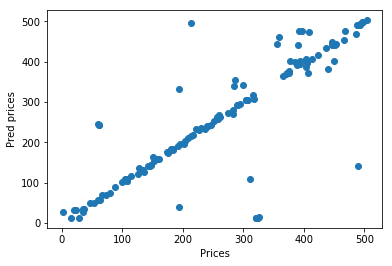

In [49]:
pred = reg.predict(X_test)
plt.scatter(Y_test, pred)
plt.xlabel("Prices")
plt.ylabel("Pred prices")
plt.show()

## 1.2 몇 가지 변수 빼고 prediction

In [78]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
target = pd.DataFrame(boston.target, columns = ['y'])
for i, y in enumerate(target['y']):
    target['y'][i] = float(i)

In [79]:
drop = []
for i in range(0, len(df.columns)):
    if random.random()<0.3:
        drop.append(df.columns[i])
df = df.drop(drop, axis = 1)
print(drop)

['CRIM', 'AGE']


In [80]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(df, target)
reg = LR()
reg.fit(X_train, Y_train)

D:\download\anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

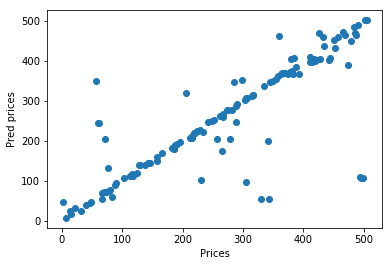

In [65]:
pred = reg.predict(X_test)
plt.scatter(Y_test, pred)
plt.xlabel("Prices")
plt.ylabel("Pred prices")
plt.show()

# 2. K-Means Clustering

In [151]:
blobs = make_blobs()
blobs = make_blobs()[0]
d = pd.DataFrame(blobs, columns = ['X', 'Y'])

In [216]:
def kmeans(k, data):
    center = []
    group1 = []
    iteration = 0
    max_iteration = 100
    assignment = []
    cnt = 0
    for i in range(0, len(d)):
        assignment.append(0)
    for i in range(0, k):
        x = random.uniform(d.min().X, d.max().X)
        y = random.uniform(d.min().Y, d.min().Y)
        center.append([x, y])
        group1.append([])
    while (iteration == 0) or (cnt < max_iteration):
        cnt += 1
        assignment_backup = list(assignment)
        for blobnum in range(0,len(d)):
            dis_list = []
            for i in range(0, k):
                distance = math.sqrt(pow((d['X'][blobnum]-center[i][0]), 2) + pow((d['Y'][blobnum]-center[i][1]), 2))
                dis_list.append(distance)
            group1[dis_list.index(min(dis_list))].append(blobs[blobnum])
            assignment[blobnum] = dis_list.index(min(dis_list))
        if (assignment == assignment_backup):
            iteration = 1
            for i in range(0, k):
                if len(group1[i]) == 0:
                    iteration = 0
        for i in range(0, k):
            center[i] = [0, 0]
            for blob in group1[i]:
                center[i][0] += blob[0]
                center[i][1] += blob[1]
            if len(group1[i]) != 0:
                center[i][0] = center[i][0]/len(group1[i])
                center[i][1] = center[i][1]/len(group1[i])
    return assignment
                 

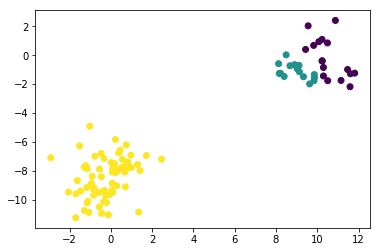

In [217]:
assignment = kmeans(3, blobs)
plt.scatter(blobs[:,0], blobs[:,1], c=assignment)
plt.show()